# Individual Match Analysis (xP and xG)

In [204]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [205]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc
from sklearn import metrics

from functools import reduce

In [206]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [207]:
folder_path = '~/Documents/GAA Analytics/2024/'

In [208]:
df = pd.read_excel(folder_path + "Football_Championship_Combined_xPoint.xlsx")

In [209]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Pressure_Count,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
2314,1265,1226,2024-07-28,All Ireland Final,Galway,Armagh,2nd,70,free short,Miss,Shane Walsh,15,forward,right,0,42.11,35.512658,21.367593,109.487342,66.632407,0,0,0,0,3,0,-32.509580,1,0.698192
2315,1266,1228,2024-07-28,All Ireland Final,Galway,Armagh,2nd,70,post,Miss,Dylan McHugh,5,back,right,1,39.52,33.069710,65.641501,111.930290,22.358499,0,1,1,1,1,0,33.201564,0,0.254069
2316,1267,1230,2024-07-28,All Ireland Final,Galway,Armagh,2nd,70,blocked,Miss,Paul Conroy,8,midfielder,right,2,30.47,24.170402,25.440793,120.829598,62.559207,0,0,2,1,2,0,-37.518803,0,0.293928
2317,1268,1227,2024-07-28,All Ireland Final,Armagh,Galway,2nd,70,wide,Miss,Stefan Campbell,24,forward,right,0,39.29,107.230615,54.838668,107.230615,54.838668,0,0,0,0,3,0,-16.011873,0,0.530292
2318,1269,1229,2024-07-28,All Ireland Final,Armagh,Galway,2nd,70,post,Miss,Niall Grimley,8,midfielder,right,0,30.34,130.089623,70.423083,130.089623,70.423083,0,0,0,0,2,0,-60.564241,0,0.656368


In [210]:
df2 = pd.read_excel(folder_path + "Football_Championship_Combined_xGoal.xlsx")

In [211]:
df2.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Pressure_Count,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xGoal,xG_Value
145,1121,241,2024-07-13,All Ireland Semi Final,Armagh,Kerry,1st,31,goal miss,Miss,Andrew Murnin,14,forward,right,1,10.05,5.150311,52.624972,139.849689,35.375028,0,1,1,1,3,0,59.156909,0,0.267315,0.801945
146,1135,255,2024-07-13,All Ireland Semi Final,Kerry,Armagh,2nd,47,goal,Score,Paul Murphy,2,back,hand,1,3.66,3.579845,43.238904,141.420155,44.761096,1,1,1,1,1,2,-12.002705,0,0.750493,2.251479
147,1143,263,2024-07-13,All Ireland Semi Final,Armagh,Kerry,2nd,55,goal,Score,Barry McCambridge,5,back,hand,1,10.40,136.196992,38.457322,136.196992,38.457322,1,1,1,1,1,2,32.195936,0,0.401951,1.205854
148,1189,123,2024-07-14,All Ireland Semi Final,Galway,Donegal,1st,24,goal,Score,Paul Conroy,8,midfielder,right,1,39.44,105.660149,41.202304,105.660149,41.202304,1,1,1,1,2,0,4.067803,0,0.002245,0.006734
149,1252,1213,2024-07-28,All Ireland Final,Armagh,Galway,2nd,47,goal,Score,Aaron McKay,3,back,hand,1,2.76,142.653353,45.452599,142.653353,45.452599,1,1,1,1,1,2,-31.757943,0,0.797607,2.392822


In [212]:
frames = [df, df2]
df = pd.concat(frames)

### Adjust Goal Value

In [213]:
df.loc[(df['Action'].str.contains('goal')) & (df['Score'] == 1), 'Score'] = 3

In [214]:
df['xScore'] = df['xG_Value'].combine_first(df['xP_adv'])

In [215]:
folder_path3 = '~/Documents/GAA Analytics/2024/'

### Adjust 2 Point Arc Value

In [216]:
df.loc[
    ((df['Action'].isin(['point', 'free'])) & 
     (df['Shot_Distance'] > 40) & 
     ((145 - df['stand_x']) > 21)),
    'Score'
] = 2

In [217]:
df['xScore'] = df['xG_Value'].combine_first(df['xP_adv'])

In [218]:
df['xScore'] = np.where(df['Score'] == 2, 2 * df['xP_adv'], df['xScore'])

In [219]:
folder_path3 = '~/Documents/GAA Analytics/2024/'

### Save file

In [220]:
df.to_excel(folder_path3 + "Football_Championship_Combined_AllShots.xlsx", index=False)

## Match ID

In [221]:
df = df[df['Date'] == '2024-07-28']

In [222]:
df = df[(df['TeamName'] == 'Galway') | (df['TeamName'] == 'Armagh')]

In [223]:
df

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Pressure_Count,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xGoal,xG_Value,xScore
2275,1225,1187,2024-07-28,All Ireland Final,Armagh,Galway,1st,3,point,Score,Oisin Conaty,12,forward,hand,0,15.53,6.066416,58.292033,138.933584,29.707967,1,1,0,0,3,2,67.000651,0,0.855438,NaN,NaN,0.855438
2276,1226,1186,2024-07-28,All Ireland Final,Galway,Armagh,1st,3,point,Score,Paul Conroy,8,midfielder,right,2,40.07,105.703773,36.155079,105.703773,36.155079,2,1,2,1,2,0,11.289849,0,0.155234,NaN,NaN,0.310467
2277,1227,1188,2024-07-28,All Ireland Final,Galway,Armagh,1st,6,point,Score,Liam Silke,6,back,left,0,29.58,120.710450,27.123201,120.710450,27.123201,1,0,0,0,1,1,34.792240,0,0.614208,NaN,NaN,0.614208
2278,1228,1189,2024-07-28,All Ireland Final,Galway,Armagh,1st,7,free,Score,Robert Finnerty,13,forward,left,0,40.13,107.972224,28.539966,107.972224,28.539966,2,0,0,0,3,1,22.661771,1,0.717930,NaN,NaN,1.435859
2279,1229,1190,2024-07-28,All Ireland Final,Armagh,Galway,1st,8,point,Score,Oisin Conaty,12,forward,right,0,36.91,27.703951,68.386484,117.296049,19.613516,1,1,0,0,3,0,41.355943,0,0.555951,NaN,NaN,0.555951
2280,1230,1191,2024-07-28,All Ireland Final,Armagh,Galway,1st,11,point,Score,Joe McElroy,10,forward,right,1,35.03,32.938838,32.081879,112.061162,55.918121,1,0,1,1,3,0,-19.891430,0,0.424683,NaN,NaN,0.424683
2281,1231,1192,2024-07-28,All Ireland Final,Armagh,Galway,1st,12,wide,Miss,Aidan Forker,7,back,left,0,40.22,24.912011,12.424264,120.087989,75.575736,0,1,0,0,1,1,-51.727952,0,0.401005,NaN,NaN,0.401005
2282,1232,1194,2024-07-28,All Ireland Final,Armagh,Galway,1st,16,blocked,Miss,Niall Grimley,8,midfielder,left,1,15.43,13.395259,36.332174,131.604741,51.667826,0,1,1,1,2,1,-29.788045,0,0.715872,NaN,NaN,0.715872
2283,1233,1193,2024-07-28,All Ireland Final,Galway,Armagh,1st,16,wide,Miss,Cillian McDaid,12,forward,right,1,38.98,107.972224,56.166885,107.972224,56.166885,0,0,1,1,3,0,-18.189906,0,0.352434,NaN,NaN,0.352434
2284,1234,1195,2024-07-28,All Ireland Final,Galway,Armagh,1st,18,wide,Miss,Damien Comer,14,forward,left,1,36.04,119.663472,69.626153,119.663472,69.626153,0,1,1,1,3,1,-45.325613,0,0.380776,NaN,NaN,0.380776


## Shot Maps

#### Team 1

In [224]:
t1 = df[df['TeamName'] == 'Armagh']

In [225]:
t1

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Pressure_Count,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xGoal,xG_Value,xScore
2275,1225,1187,2024-07-28,All Ireland Final,Armagh,Galway,1st,3,point,Score,Oisin Conaty,12,forward,hand,0,15.53,6.066416,58.292033,138.933584,29.707967,1,1,0,0,3,2,67.000651,0,0.855438,NaN,NaN,0.855438
2279,1229,1190,2024-07-28,All Ireland Final,Armagh,Galway,1st,8,point,Score,Oisin Conaty,12,forward,right,0,36.91,27.703951,68.386484,117.296049,19.613516,1,1,0,0,3,0,41.355943,0,0.555951,NaN,NaN,0.555951
2280,1230,1191,2024-07-28,All Ireland Final,Armagh,Galway,1st,11,point,Score,Joe McElroy,10,forward,right,1,35.03,32.938838,32.081879,112.061162,55.918121,1,0,1,1,3,0,-19.891430,0,0.424683,NaN,NaN,0.424683
2281,1231,1192,2024-07-28,All Ireland Final,Armagh,Galway,1st,12,wide,Miss,Aidan Forker,7,back,left,0,40.22,24.912011,12.424264,120.087989,75.575736,0,1,0,0,1,1,-51.727952,0,0.401005,NaN,NaN,0.401005
2282,1232,1194,2024-07-28,All Ireland Final,Armagh,Galway,1st,16,blocked,Miss,Niall Grimley,8,midfielder,left,1,15.43,13.395259,36.332174,131.604741,51.667826,0,1,1,1,2,1,-29.788045,0,0.715872,NaN,NaN,0.715872
2285,1235,1196,2024-07-28,All Ireland Final,Armagh,Galway,1st,20,free wide,Miss,Conor Turbitt,15,forward,right,0,36.68,36.603259,41.645043,108.396741,46.354957,0,0,0,0,3,0,-3.681185,1,0.777371,NaN,NaN,0.777371
2288,1238,1199,2024-07-28,All Ireland Final,Armagh,Galway,1st,25,point,Score,Aidan Forker,7,back,left,1,33.38,29.099921,27.654488,115.900079,60.345512,1,1,1,1,1,1,-29.323051,0,0.346719,NaN,NaN,0.346719
2290,1240,1201,2024-07-28,All Ireland Final,Armagh,Galway,1st,27,point,Score,Barry McCambridge,4,back,right,1,37.09,36.603259,49.968538,108.396741,38.031462,1,1,1,1,1,0,9.261159,0,0.292311,NaN,NaN,0.292311
2293,1243,1204,2024-07-28,All Ireland Final,Armagh,Galway,1st,33,offensive mark wide,Miss,Joe McElroy,10,forward,left,0,30.15,24.563018,61.479754,120.436982,26.520246,0,0,0,0,3,1,35.436754,1,0.845572,NaN,NaN,0.845572
2294,1244,1205,2024-07-28,All Ireland Final,Armagh,Galway,1st,35,point,Score,Ben Crealy,9,midfielder,right,0,40.37,27.529455,73.522257,117.470545,14.477743,2,1,0,0,2,0,47.000514,0,0.445854,NaN,NaN,0.891708


In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Arc
from matplotlib.lines import Line2D
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

def shot_map(data):
    #shot_data = data[(data['Action'] == "point") | (data['Action'] == "free") | (data['Action'] == "fortyfive")
     #                | (data['Action'] == "blocked") | (data['Action'] == "fortyfive short") | (data['Action'] == "fortyfive wide") | (data['Action'] == "free short")
      #               | (data['Action'] == "free wide") | (data['Action'] == "goal") | (data['Action'] == "goal miss")
       #              | (data['Action'] == "offensive mark") | (data['Action'] == "penalty goal")
        #             | (data['Action'] == "post") | (data['Action'] == "short") | (data['Action'] == "wide")
         #           | (data['Action'] == "offensive mark wide") | (data['Action'] == "free post")]

    shot_data = data

    # Rest of the pitch lines...
    fig=plt.figure()
    fig.set_size_inches(7, 8.8)
    ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="black")
    plt.plot([0,145],[88,88], color="black")
    plt.plot([145,145],[88,0], color="black")
    plt.plot([145,0],[0,0], color="black")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="black")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="black")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black")
    
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="black",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="black",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="black")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="black")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="black")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="black")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="black")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="black")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="black")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="black")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="black")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="black")
    
  #  ly921 = [124,30] 
   # lx921 = [0,30]
    #plt.plot(lx921,ly921,color="black")

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="black")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="black")
    
    

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
            #2 point arcs
    circle4 = plt.Circle((145,44), 40,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    circle5 = plt.Circle((0,44), 40,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    rec1 = plt.Rectangle((124,0), 124,145,ls='-',color="white", zorder=1,alpha=1)
    rec2 = plt.Rectangle((-1, 0), 22,89,ls='-',color="white", zorder=1,alpha=1)
    # Prepare Arcs...
    
    ax.add_artist(circle4)
    ax.add_artist(circle5)
    ax.add_artist(rec1)
    ax.add_artist(rec2)
    
    plt.axis('off')

   # Separate shot data based on Placed_Ball
    placed_ball_data = shot_data[shot_data['Placed_Ball'] == 1]
    normal_data = shot_data[shot_data['Placed_Ball'] != 1]
    
    goal_data = shot_data[shot_data['xG_Value'] != None]
    scored_goals = shot_data[shot_data['Score'] == 3]
    point_data = shot_data[(shot_data['Score'] == 1) | (shot_data['Score'] == 2)]

    # Get the minimum and maximum xP_adv values from the combined data
    min_xp_adv = shot_data['xP_adv'].min()
    max_xp_adv = shot_data['xP_adv'].max()

    # Normalize the sizes based on the combined min and max xP_adv values
    norm = Normalize(vmin=min_xp_adv, vmax=max_xp_adv)

    # Plot scatter plot with circles for normal shots
    sns.scatterplot(
        data=normal_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green', 2: 'green', 3: 'green'},
        size='xP_adv',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='o',
        size_norm=norm
    )

    # Plot scatter plot with hexagons for placed ball shots
    sns.scatterplot(
        data=placed_ball_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green', 2: 'green', 3: 'green'},
        size='xP_adv',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='h',
        size_norm=norm
    )
    
    
        # Plot scatter plot with X for goal shots
    sns.scatterplot(
        data=goal_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green', 2: 'green', 3: 'green'},
        size='xGoal',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='X',
        size_norm=norm
    )

    # Set limits for x-axis
    plt.xlim(80, 145)

    # Calculate total number of shots
    total_shots = len(shot_data)
    total_points = len(point_data)
    total_goals = len(scored_goals)
    # Calculate total score
    total_score = shot_data['Score'].sum()
    expected_score = shot_data['xScore'].sum()
    # Calculate sum of xP_Adv
    total_xp_adv = shot_data['xP_adv'].sum()
    xG_total = shot_data['xGoal'].sum()
    avg_xp_per_shot = total_xp_adv / total_shots  # Calculate average expected points per shot

    # Display total shots, total score, and sum of xP_Adv under the graph
    plt.text(146, 75, f'Total Shots: {total_shots}', fontsize=12, fontweight='bold')
    plt.text(146, 70, f'Total Goals (xG): {total_goals} ({xG_total:.2f})', fontsize=12, fontweight='bold')
    plt.text(146, 65, f'Total Points (xP): {total_points} ({total_xp_adv:.2f})', fontsize=12, fontweight='bold')
    plt.text(146, 60, f'Total Score (xTotal): {total_score} ({expected_score:.2f})', fontsize=12, fontweight='bold')
    plt.text(146, 55, f'Expected Points per Shot: {avg_xp_per_shot:.2f}', fontsize=12, fontweight='bold')
    
    #for _, row in data.iterrows():
     #   plt.text(row['stand_x'], row['stand_y'], f"{row['Score']:.2f}", fontsize=8, ha='right', color='blue')


    # Add legend for color
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Miss'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Score')]
    ax.legend(handles=legend_elements, loc='best')

    # Add legend for shape and size
    legend_elements2 = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='From Play (Point)'),
                        Line2D([0], [0], marker='h', color='w', markerfacecolor='black', markersize=10, label='Placed Ball (Point)'), 
                       Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=10, label='From Play (Goal)')]
    ax.legend(handles=legend_elements2, loc='best', bbox_to_anchor=(1, 0.5))

    ax.set_title('Armagh Shots', fontsize=16, fontweight='bold', color='black')

   # plt.savefig('Armagh_Shots_v_Galway_F.png', dpi=300, bbox_inches='tight')

    plt.show()


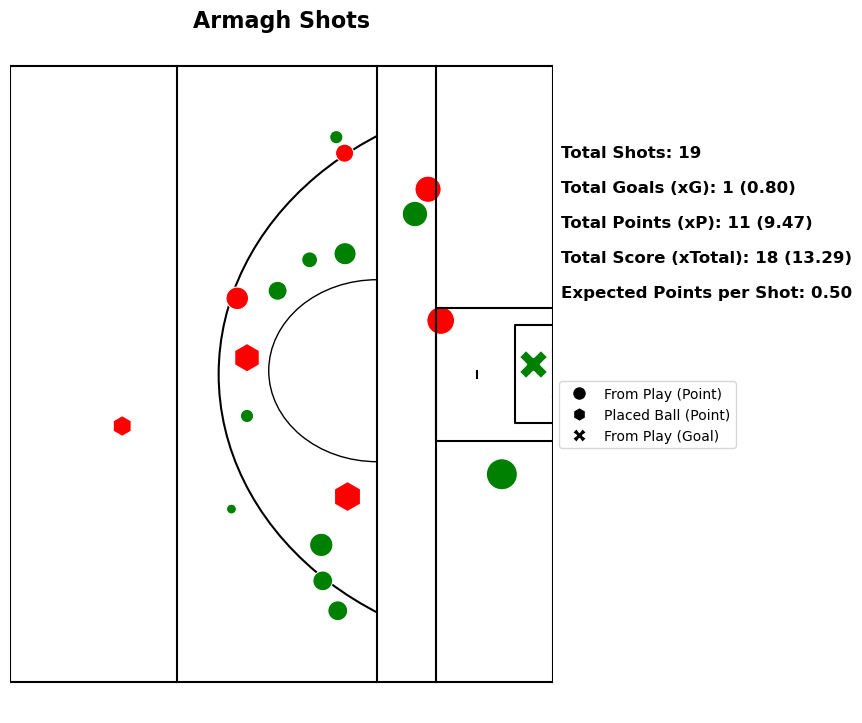

In [227]:
shot_map(t1)

In [228]:
t2 = df[df['TeamName'] == 'Galway']

In [229]:
t2

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Pressure_Count,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xGoal,xG_Value,xScore
2276,1226,1186,2024-07-28,All Ireland Final,Galway,Armagh,1st,3,point,Score,Paul Conroy,8,midfielder,right,2,40.07,105.703773,36.155079,105.703773,36.155079,2,1,2,1,2,0,11.289849,0,0.155234,NaN,NaN,0.310467
2277,1227,1188,2024-07-28,All Ireland Final,Galway,Armagh,1st,6,point,Score,Liam Silke,6,back,left,0,29.58,120.710450,27.123201,120.710450,27.123201,1,0,0,0,1,1,34.792240,0,0.614208,NaN,NaN,0.614208
2278,1228,1189,2024-07-28,All Ireland Final,Galway,Armagh,1st,7,free,Score,Robert Finnerty,13,forward,left,0,40.13,107.972224,28.539966,107.972224,28.539966,2,0,0,0,3,1,22.661771,1,0.717930,NaN,NaN,1.435859
2283,1233,1193,2024-07-28,All Ireland Final,Galway,Armagh,1st,16,wide,Miss,Cillian McDaid,12,forward,right,1,38.98,107.972224,56.166885,107.972224,56.166885,0,0,1,1,3,0,-18.189906,0,0.352434,NaN,NaN,0.352434
2284,1234,1195,2024-07-28,All Ireland Final,Galway,Armagh,1st,18,wide,Miss,Damien Comer,14,forward,left,1,36.04,119.663472,69.626153,119.663472,69.626153,0,1,1,1,3,1,-45.325613,0,0.380776,NaN,NaN,0.380776
2286,1236,1197,2024-07-28,All Ireland Final,Galway,Armagh,1st,20,point,Score,Cein Darcy,22,forward,right,1,29.26,130.133247,18.799707,130.133247,18.799707,1,1,1,1,3,0,59.461791,0,0.513986,NaN,NaN,0.513986
2287,1237,1198,2024-07-28,All Ireland Final,Galway,Armagh,1st,24,free wide,Miss,Shane Walsh,15,forward,left,0,36.05,109.891683,35.800887,109.891683,35.800887,0,0,0,0,3,1,13.145122,1,0.777445,NaN,NaN,0.777445
2289,1239,1200,2024-07-28,All Ireland Final,Galway,Armagh,1st,26,point,Score,John Maher,11,midfielder,right,1,37.60,107.623231,39.874087,107.623231,39.874087,1,1,1,1,2,0,6.299212,0,0.321136,NaN,NaN,0.321136
2291,1241,1202,2024-07-28,All Ireland Final,Galway,Armagh,1st,30,free wide,Miss,Shane Walsh,15,forward,right,0,33.14,129.609758,73.345161,129.609758,73.345161,0,0,0,0,3,0,-62.324974,1,0.823011,NaN,NaN,0.823011
2292,1242,1203,2024-07-28,All Ireland Final,Galway,Armagh,1st,32,point,Score,Paul Conroy,8,midfielder,right,1,45.64,104.831292,22.341619,104.831292,22.341619,2,1,1,1,2,0,28.332898,0,0.202094,NaN,NaN,0.404189


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Arc
from matplotlib.lines import Line2D
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

def shot_map(data):
    #shot_data = data[(data['Action'] == "point") | (data['Action'] == "free") | (data['Action'] == "fortyfive")
     #                | (data['Action'] == "blocked") | (data['Action'] == "fortyfive short") | (data['Action'] == "fortyfive wide") | (data['Action'] == "free short")
      #               | (data['Action'] == "free wide") | (data['Action'] == "goal") | (data['Action'] == "goal miss")
       #              | (data['Action'] == "offensive mark") | (data['Action'] == "penalty goal")
        #             | (data['Action'] == "post") | (data['Action'] == "short") | (data['Action'] == "wide")
         #           | (data['Action'] == "offensive mark wide") | (data['Action'] == "free post")]

    shot_data = data

    # Rest of the pitch lines...
    fig=plt.figure()
    fig.set_size_inches(7, 8.8)
    ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="black")
    plt.plot([0,145],[88,88], color="black")
    plt.plot([145,145],[88,0], color="black")
    plt.plot([145,0],[0,0], color="black")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="black")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="black")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black")
    
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="black",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="black",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="black")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="black")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="black")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="black")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="black")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="black")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="black")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="black")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="black")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="black")
    
  #  ly921 = [124,30] 
   # lx921 = [0,30]
    #plt.plot(lx921,ly921,color="black")

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="black")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="black")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    
                #2 point arcs
    circle4 = plt.Circle((145,44), 40,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    circle5 = plt.Circle((0,44), 40,ls='solid',lw=1.5,color="black", fill=False, zorder=1,alpha=1)
    rec1 = plt.Rectangle((124,0), 124,145,ls='-',color="white", zorder=1,alpha=1)
    rec2 = plt.Rectangle((-1, 0), 22,89,ls='-',color="white", zorder=1,alpha=1)
    # Prepare Arcs...
    
    ax.add_artist(circle4)
    ax.add_artist(circle5)
    ax.add_artist(rec1)
    ax.add_artist(rec2)
    
    # Prepare Arcs...
    
    plt.axis('off')

   # Separate shot data based on Placed_Ball
    placed_ball_data = shot_data[shot_data['Placed_Ball'] == 1]
    normal_data = shot_data[shot_data['Placed_Ball'] != 1]
    
    goal_data = shot_data[shot_data['xG_Value'] != None]
    scored_goals = shot_data[shot_data['Score'] == 3]
    point_data = shot_data[(shot_data['Score'] == 1) | (shot_data['Score'] == 2)]

    # Get the minimum and maximum xP_adv values from the combined data
    min_xp_adv = shot_data['xP_adv'].min()
    max_xp_adv = shot_data['xP_adv'].max()

    # Normalize the sizes based on the combined min and max xP_adv values
    norm = Normalize(vmin=min_xp_adv, vmax=max_xp_adv)

    # Plot scatter plot with circles for normal shots
    sns.scatterplot(
        data=normal_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green', 2: 'green', 3: 'green'},
        size='xP_adv',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='o',
        size_norm=norm
    )

    # Plot scatter plot with hexagons for placed ball shots
    sns.scatterplot(
        data=placed_ball_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green', 2: 'green', 3: 'green'},
        size='xP_adv',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='h',
        size_norm=norm
    )
    
    
        # Plot scatter plot with X for goal shots
    sns.scatterplot(
        data=goal_data,
        x='stand_x',
        y='stand_y',
        hue='Score',
        palette={0: 'red', 1: 'green', 2: 'green', 3: 'green'},
        size='xGoal',
        sizes=(50, 500),
        ax=ax,
        legend=False,
        marker='X',
        size_norm=norm
    )

    # Set limits for x-axis
    plt.xlim(80, 145)

    # Calculate total number of shots
    total_shots = len(shot_data)
    total_points = len(point_data)
    total_goals = len(scored_goals)
    # Calculate total score
    total_score = shot_data['Score'].sum()
    expected_score = shot_data['xScore'].sum()
    # Calculate sum of xP_Adv
    total_xp_adv = shot_data['xP_adv'].sum()
    xG_total = shot_data['xGoal'].sum()
    avg_xp_per_shot = total_xp_adv / total_shots  # Calculate average expected points per shot

    # Display total shots, total score, and sum of xP_Adv under the graph
    plt.text(146, 75, f'Total Shots: {total_shots}', fontsize=12, fontweight='bold')
    plt.text(146, 70, f'Total Goals (xG): {total_goals} ({xG_total:.2f})', fontsize=12, fontweight='bold')
    plt.text(146, 65, f'Total Points (xP): {total_points} ({total_xp_adv:.2f})', fontsize=12, fontweight='bold')
    plt.text(146, 60, f'Total Score (xTotal): {total_score} ({expected_score:.2f})', fontsize=12, fontweight='bold')
    plt.text(146, 55, f'Expected Points per Shot: {avg_xp_per_shot:.2f}', fontsize=12, fontweight='bold')
    
    #for _, row in data.iterrows():
     #   plt.text(row['stand_x'], row['stand_y'], f"{row['Score']:.2f}", fontsize=8, ha='right', color='blue')


    # Add legend for color
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Miss'),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Score')]
    ax.legend(handles=legend_elements, loc='best')

    # Add legend for shape and size
    legend_elements2 = [Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='From Play (Point)'),
                        Line2D([0], [0], marker='h', color='w', markerfacecolor='black', markersize=10, label='Placed Ball (Point)'), 
                       Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=10, label='From Play (Goal)')]
    ax.legend(handles=legend_elements2, loc='best', bbox_to_anchor=(1, 0.5))

    ax.set_title('Galway Shots', fontsize=16, fontweight='bold', color='black')

   # plt.savefig('Galway_Shots_v_Armagh_F.png', dpi=300, bbox_inches='tight')

    plt.show()


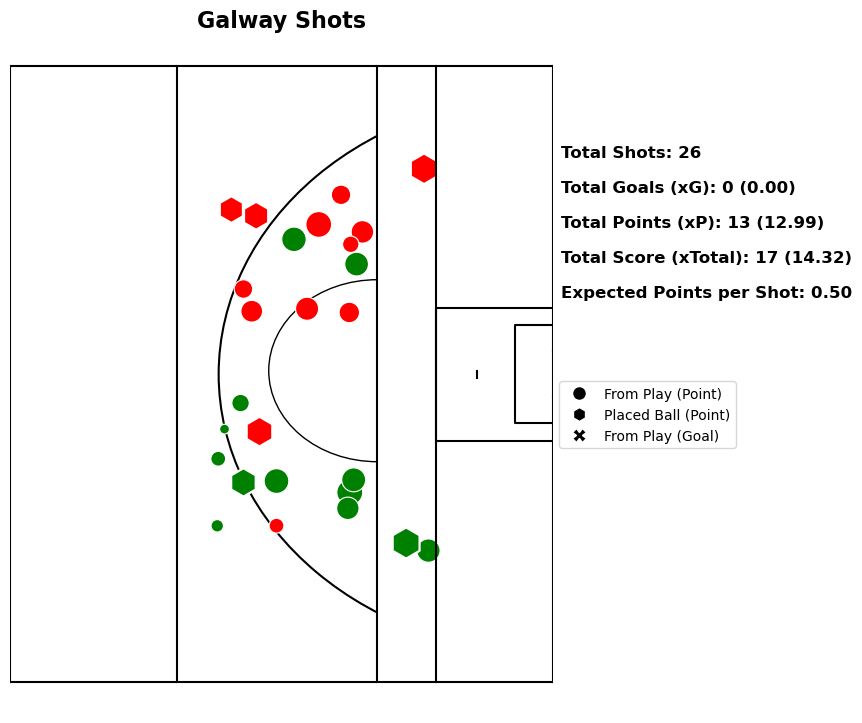

In [231]:
shot_map(t2)

## xP by minute

In [232]:
df = df.sort_values(by=['Unnamed: 0'])

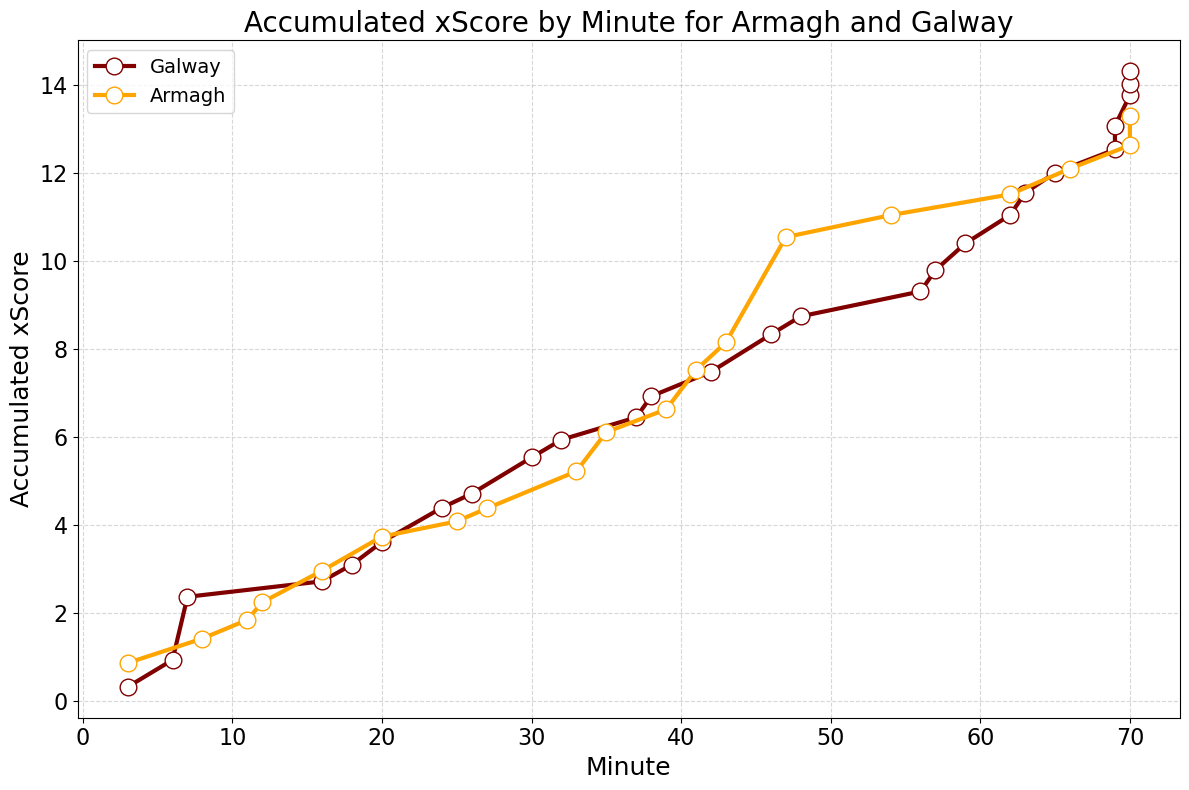

In [233]:
# Accumulate xP by minute for each team
df['cumulative_xP'] = df.groupby('TeamName')['xScore'].cumsum()

# Separate the data by team
Armagh_data = df[df['TeamName'] == 'Armagh']
Galway_data = df[df['TeamName'] == 'Galway']

# Plotting
#plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

plt.plot(Galway_data['Minute'], Galway_data['cumulative_xP'], label='Galway', color='maroon', marker='o', markerfacecolor='white', markersize=12, linewidth=3)
plt.plot(Armagh_data['Minute'], Armagh_data['cumulative_xP'], label='Armagh', color='orange', marker='o', markerfacecolor='white', markersize=12, linewidth=3)

plt.xlabel('Minute', fontsize=18)
plt.ylabel('Accumulated xScore', fontsize=18)
plt.title('Accumulated xScore by Minute for Armagh and Galway', fontsize=20)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Additional style elements
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

#plt.savefig('Accumulated_xScore_Armagh_Galway_F.png', dpi=300, bbox_inches='tight')

plt.show()


## Total xP per Team

In [234]:
df.groupby('TeamName').count()

,Unnamed: 0.1,Unnamed: 0,Date,Game,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Pressure_Count,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xGoal,xG_Value,xScore,cumulative_xP
TeamName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Armagh,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,18,1,1,19,19
Galway,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0,0,26,26


In [235]:
tm = df.groupby('TeamName').count()

tm = tm[['Action']]
tm = tm.reset_index()
tm


,TeamName,Action
0,Armagh,19
1,Galway,26


In [236]:
tm1 = df.groupby('TeamName').sum()
tm1 = tm1.reset_index()
tm1 = tm1[['TeamName', 'xP_adv', 'xGoal', 'xG_Value', 'xScore', 'Score', 'Pressure_Value', 'Pressure_Count']]
tm1

,TeamName,xP_adv,xGoal,xG_Value,xScore,Score,Pressure_Value,Pressure_Count
0,Armagh,9.469832,0.797607,2.392822,13.286631,18,8,8
1,Galway,12.987193,0.000000,0.000000,14.316532,17,18,15


In [237]:
tm2 = df.groupby('TeamName').mean()
tm2 = tm2.reset_index()
tm2 = tm2[['TeamName', 'Shot_Distance', 'Shot_Angle']]
tm2

,TeamName,Shot_Distance,Shot_Angle
0,Armagh,33.253684,-5.090837
1,Galway,35.210385,-1.869900


In [238]:
pts = df[df['Score'] == 1]
pts = pts.groupby('TeamName').sum()
pts = pts[['Score']]
pts = pts.reset_index()
pts = pts.rename(columns={'Score': 'Points'})
pts

,TeamName,Points
0,Armagh,7
1,Galway,9


In [239]:
dpts = df[df['Score'] == 2]
dpts = dpts.groupby('TeamName').count()
dpts = dpts[['Score']]
dpts = dpts.reset_index()
dpts = dpts.rename(columns={'Score': '2_Pointers'})
dpts

,TeamName,2_Pointers
0,Armagh,4
1,Galway,4


In [240]:
gls = df[df['Score'] == 3]
gls = gls.groupby('TeamName').count()
gls = gls[['Score']]
gls = gls.reset_index()
gls = gls.rename(columns={'Score': 'Goals'})
gls

,TeamName,Goals
0,Armagh,1


In [241]:
merged_df = pd.merge(tm, tm1, on='TeamName')
merged_df = pd.merge(merged_df, tm2, on='TeamName')
merged_df = pd.merge(merged_df, pts, on='TeamName')
merged_df = pd.merge(merged_df, dpts, on='TeamName')
merged_df = pd.merge(merged_df, gls, on='TeamName', how='left')
merged_df['Goals'] = merged_df['Goals'].fillna(0).astype(int)
merged_df['2_Pointers'] = merged_df['2_Pointers'].fillna(0).astype(int)
merged_df

,TeamName,Action,xP_adv,xGoal,xG_Value,xScore,Score,Pressure_Value,Pressure_Count,Shot_Distance,Shot_Angle,Points,2_Pointers,Goals
0,Armagh,19,9.469832,0.797607,2.392822,13.286631,18,8,8,33.253684,-5.090837,7,4,1
1,Galway,26,12.987193,0.000000,0.000000,14.316532,17,18,15,35.210385,-1.869900,9,4,0


In [242]:
md = merged_df.rename(columns={'Action': 'Shots'})
md

,TeamName,Shots,xP_adv,xGoal,xG_Value,xScore,Score,Pressure_Value,Pressure_Count,Shot_Distance,Shot_Angle,Points,2_Pointers,Goals
0,Armagh,19,9.469832,0.797607,2.392822,13.286631,18,8,8,33.253684,-5.090837,7,4,1
1,Galway,26,12.987193,0.000000,0.000000,14.316532,17,18,15,35.210385,-1.869900,9,4,0


In [244]:
md = md[['TeamName', 'Shots', 'Goals', '2_Pointers', 'Points', 'Score', 'xGoal', 'xP_adv', 'xScore', 'Pressure_Value', 'Pressure_Count', 'Shot_Distance', 'Shot_Angle']]

In [245]:
md

,TeamName,Shots,Goals,2_Pointers,Points,Score,xGoal,xP_adv,xScore,Pressure_Value,Pressure_Count,Shot_Distance,Shot_Angle
0,Armagh,19,1,4,7,18,0.797607,9.469832,13.286631,8,8,33.253684,-5.090837
1,Galway,26,0,4,9,17,0.000000,12.987193,14.316532,18,15,35.210385,-1.869900


In [246]:
md['Total_Points'] = md['Points'] + md['2_Pointers']

# Calculate the numerical difference between md.Score and md.xPoints
md['xP Difference'] = md['Points'] - md['xP_adv']
md['xScore Difference'] = md['Score'] - md['xScore']
md['xG Difference'] = md['Goals'] - md['xGoal']

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='xP Difference', ascending=False)



md['xP per Shot'] = md['xP_adv'] / md['Shots']
md['Points per Shot'] = md['Score'] / md['Shots']
md['xPPS Difference'] = md['Points per Shot'] - md['xP per Shot']


md['% Shots w/ Pressure'] = md['Pressure_Count'] / md['Shots']

md.rename(columns={'TeamName': 'Team'}, inplace=True)
md.rename(columns={'xP_adv': 'xP'}, inplace=True)
md.rename(columns={'Score': 'Total_Score'}, inplace=True)
md.rename(columns={'Shot_Distance': 'Avg. Shot Distance'}, inplace=True)
md.rename(columns={'Shot_Angle': 'Avg. Shot Angle'}, inplace=True)


md['xP'] = md['xP'].round(2)
md['xG'] = md['xGoal'].round(2)
md['xScore'] = md['xScore'].round(2)
md['xP Difference'] = md['xP Difference'].round(2)
md['xScore Difference'] = md['xScore Difference'].round(2)
md['xG Difference'] = md['xG Difference'].round(2)
md['xPPS Difference'] = md['xPPS Difference'].round(2)

md['xP per Shot'] = md['xP per Shot'].round(2)

md['Points per Shot'] = md['Points per Shot'].round(2)

md['% Shots w/ Pressure'] = md['% Shots w/ Pressure'].round(2)
md['% Shots w/ Pressure'] = md['% Shots w/ Pressure'] * 100
md['% Shots w/ Pressure'] = md['% Shots w/ Pressure'].apply(lambda x: f'{x:.0f}%')
md['Avg. Shot Distance'] = md['Avg. Shot Distance'].round(2)
md['Avg. Shot Angle'] = md['Avg. Shot Angle'].round(2)

md = md[['Team', 'Shots', 'Goals', 'Total_Points', 'Points', '2_Pointers', 'Total_Score', 'xG', 'xP', 'xScore', 'xP Difference', 'xG Difference', 'xScore Difference', 'xP per Shot', 'Points per Shot', 'xPPS Difference', '% Shots w/ Pressure', 'Avg. Shot Distance']]

md = md.transpose()

md.columns = md.iloc[0]
md = md[1:]
md

Team,Armagh,Galway
Shots,19,26
Goals,1,0
Total_Points,11,13
Points,7,9
2_Pointers,4,4
Total_Score,18,17
xG,0.8,0.0
xP,9.47,12.99
xScore,13.29,14.32
xP Difference,-2.47,-3.99


In [247]:
md = md.reset_index()

In [248]:
md.rename(columns={'index': 'Stats'}, inplace=True)

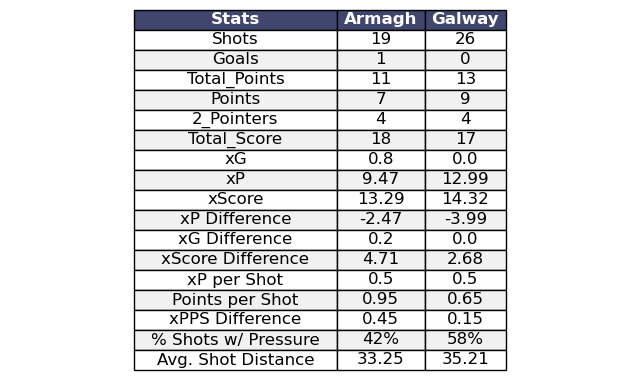

In [249]:
# Create a figure and axis

# Create a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed

# Remove the x and y axis
ax.axis('off')

# Create the table
table_data = md.values
table_columns = md.columns
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')

# Adjust the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(md.columns))))

# Style the table headers
for i in range(len(table_columns)):
    cell = table[(0, i)]
    cell.set_fontsize(14)
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#40466e')

# Style the table rows
for i in range(1, len(md) + 1):
    for j in range(len(table_columns)):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#f1f1f2')
        else:
            cell.set_facecolor('white')

# Adjust cell borders
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

#plt.savefig('Game_Summary_Armagh_Galway.png', dpi=300, bbox_inches='tight')

# Show the table
plt.show()

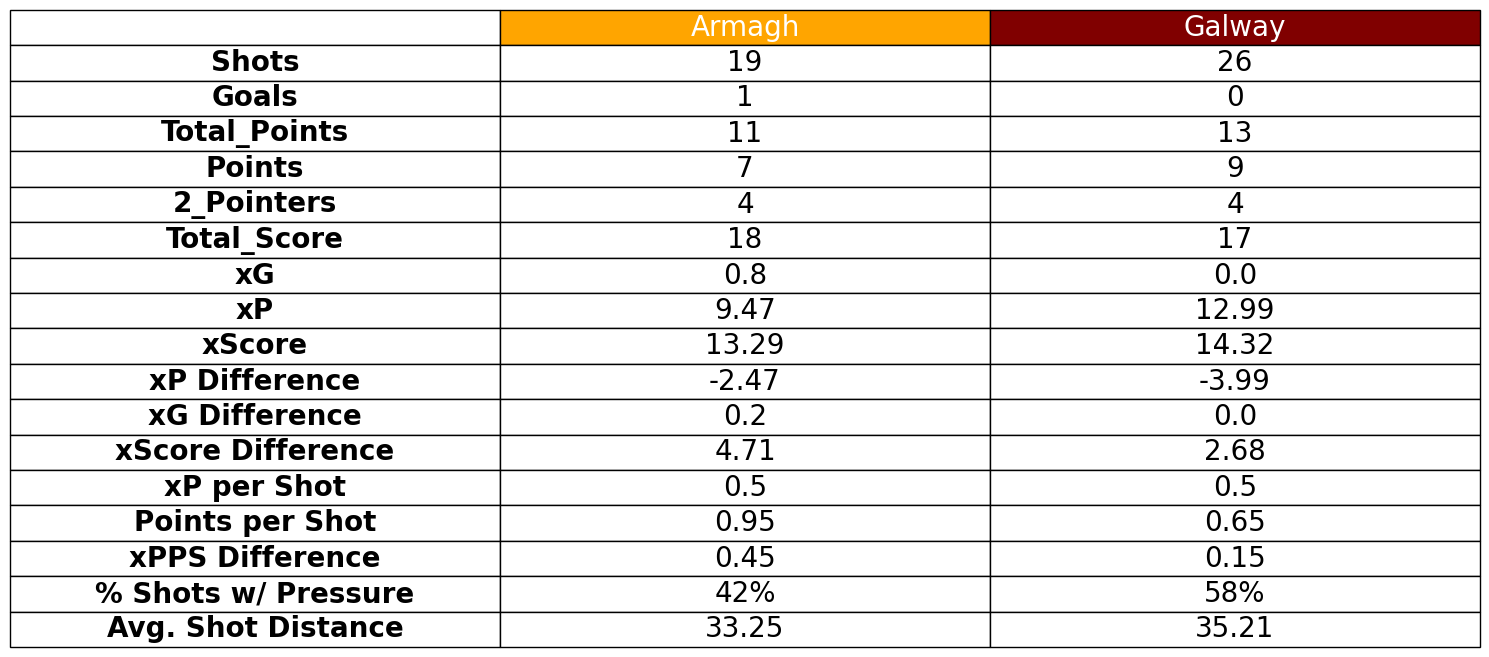

In [250]:


# Create a figure and an axis
fig, ax = plt.subplots(figsize=(15, 10)) 

# Hide axes
ax.axis('off')
ax.axis('tight')

# Create a table
table = ax.table(cellText=md.values,
                 colLabels=md.columns,
                 cellLoc='center',
                 loc='center')

# Apply styles
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)
    cell.set_text_props(ha='center', va='center', fontsize=60)  # Increase font size
    cell.set_height(0.1)


    if i == 0:
        # Apply header styles
        if md.columns[j] == 'Galway':
            cell.set_facecolor('maroon')
            cell.get_text().set_color('white')
        elif md.columns[j] == 'Armagh':
            cell.set_facecolor('orange')
            cell.get_text().set_color('white')
        elif md.columns[j] == 'Stats':
            cell.set_facecolor('white')
            cell.get_text().set_color('white')
            cell.get_text().set_weight('bold') 
    else:
        # Apply bold style to all cells in the 'index' column
        if j == md.columns.get_loc('Stats'):
            cell.get_text().set_weight('bold')
            cell.get_text().set_color('black')  # Ensure text color is set to visible
        else:
            # Set a default cell background color if needed
            cell.set_facecolor('white')
        

# Adjust layout
fig.tight_layout()

# Save the figure as an image
#plt.savefig('Summary_Table_Armagh_Galway_F.png', dpi=300, bbox_inches='tight')
plt.show()


## Total xP per Player

In [252]:
tm = df.groupby(['PlayerName', 'TeamName']).count()

tm = tm[['Action']]
tm = tm.reset_index()
tm

tm1 = df.groupby(['PlayerName', 'TeamName']).sum()

tm1 = tm1.reset_index()

tm1

,PlayerName,TeamName,Unnamed: 0.1,Unnamed: 0,Minute,PlayerNumber,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Pressure_Count,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xGoal,xG_Value,xScore,cumulative_xP
0,Aaron McKay,Armagh,1252,1213,47,3,2.76,142.653353,45.452599,142.653353,45.452599,3,1,1,1,1,2,-31.757943,0,0.000000,0.797607,2.392822,2.392822,10.542330
1,Aidan Forker,Armagh,2469,2391,37,14,73.60,54.011932,40.078752,235.988068,135.921248,1,2,1,1,2,2,-81.051003,0,0.747724,0.000000,0.000000,0.747724,6.314118
2,Barry McCambridge,Armagh,1240,1201,27,4,37.09,36.603259,49.968538,108.396741,38.031462,1,1,1,1,1,0,9.261159,0,0.292311,0.000000,0.000000,0.292311,4.369351
3,Ben Crealy,Armagh,1244,1205,35,9,40.37,27.529455,73.522257,117.470545,14.477743,2,1,0,0,2,0,47.000514,0,0.445854,0.000000,0.000000,0.891708,6.106631
4,Cein Darcy,Galway,5011,4855,204,88,129.17,214.684694,128.947351,480.581801,172.652062,3,3,2,2,12,1,13.049132,0,2.215873,0.000000,0.000000,2.215873,35.845643
5,Cillian McDaid,Galway,5003,4846,186,48,129.16,185.718317,213.067776,465.226131,163.265994,2,2,4,4,12,0,34.529571,0,1.872092,0.000000,0.000000,1.872092,34.254086
6,Conor Turbitt,Armagh,1235,1196,20,15,36.68,36.603259,41.645043,108.396741,46.354957,0,0,0,0,3,0,-3.681185,1,0.777371,0.000000,0.000000,0.777371,3.730321
7,Damien Comer,Galway,1234,1195,18,14,36.04,119.663472,69.626153,119.663472,69.626153,0,1,1,1,3,1,-45.325613,0,0.380776,0.000000,0.000000,0.380776,3.093745
8,Dylan McHugh,Galway,2527,2450,135,10,76.66,69.105857,100.645458,220.894143,75.354542,0,2,1,1,2,1,19.184766,0,0.710992,0.000000,0.000000,0.710992,26.029209
9,Joe McElroy,Armagh,2473,2395,44,20,65.18,57.501857,93.561633,232.498143,82.438367,1,0,1,1,6,1,15.545324,1,1.270256,0.000000,0.000000,1.270256,7.050996


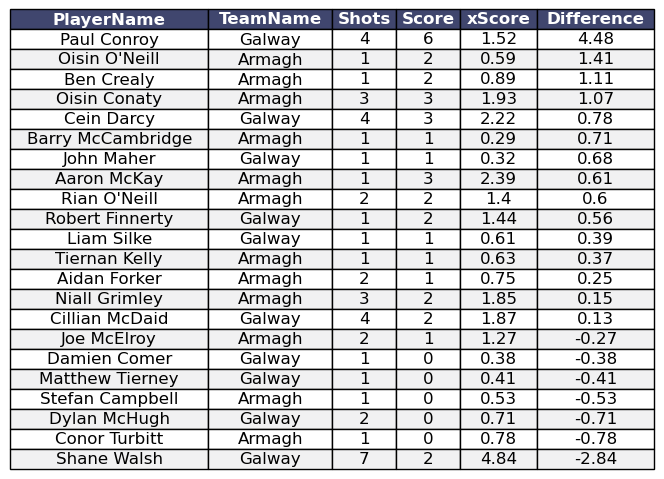

In [251]:
tm = df.groupby(['PlayerName', 'TeamName']).count()

tm = tm[['Action']]
tm = tm.reset_index()
tm

tm1 = df.groupby(['PlayerName', 'TeamName']).sum()

tm1 = tm1.reset_index()

tm1 = tm1[['PlayerName', 'TeamName', 'xScore', 'Score']]


merged_df = pd.merge(tm, tm1, on=['PlayerName', 'TeamName'])

md = merged_df.rename(columns={'Action': 'Shots'})
#md = md.rename(columns={'xP_adv': 'xP'})
#md = md.rename(columns={'Score': 'Points'})

md = md[['PlayerName', 'TeamName', 'Shots', 'Score', 'xScore']]

# Calculate the numerical difference between md.Score and md.xPoints
md['Difference'] = md['Score'] - md['xScore']

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='Difference', ascending=False)


md['xScore'] = md['xScore'].round(2)
md['Difference'] = md['Difference'].round(2)



# Create a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed

# Remove the x and y axis
ax.axis('off')

# Create the table
table_data = md.values
table_columns = md.columns
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')

# Adjust the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(md.columns))))

# Style the table headers
for i in range(len(table_columns)):
    cell = table[(0, i)]
    cell.set_fontsize(14)
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#40466e')

# Style the table rows
for i in range(1, len(md) + 1):
    for j in range(len(table_columns)):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#f1f1f2')
        else:
            cell.set_facecolor('white')

# Adjust cell borders
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

#plt.savefig('Individual_xP_Armagh_Galway_F.png', dpi=300, bbox_inches='tight')

# Show the table
plt.show()


# Rough

## Total xP per Team

In [350]:
df.groupby('PlayerName').count()

,Unnamed: 0.1,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Pressure_Count,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xGoal,xG_Value,xScore,cumulative_xP
PlayerName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron McKay,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Aidan Forker,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2
Barry McCambridge,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
Ben Crealy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
Cein Darcy,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,4,4
Cillian McDaid,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,4,4
Conor Turbitt,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
Damien Comer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
Dylan McHugh,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2


In [351]:
tm = df.groupby('PlayerName').count()

tm = tm[['Action']]
tm = tm.reset_index()
tm


,PlayerName,Action
0,Aaron McKay,1
1,Aidan Forker,2
2,Barry McCambridge,1
3,Ben Crealy,1
4,Cein Darcy,4
5,Cillian McDaid,4
6,Conor Turbitt,1
7,Damien Comer,1
8,Dylan McHugh,2
9,Joe McElroy,2


In [352]:
tm1 = df.groupby('PlayerName').sum()
tm1 = tm1.reset_index()
tm1 = tm1[['PlayerName', 'xP_adv', 'xGoal', 'xG_Value', 'xScore', 'Score', 'Pressure_Value', 'Pressure_Count']]
tm1

,PlayerName,xP_adv,xGoal,xG_Value,xScore,Score,Pressure_Value,Pressure_Count
0,Aaron McKay,0.000000,0.797607,2.392822,2.392822,3,1,1
1,Aidan Forker,0.747724,0.000000,0.000000,0.747724,1,1,1
2,Barry McCambridge,0.292311,0.000000,0.000000,0.292311,1,1,1
3,Ben Crealy,0.445854,0.000000,0.000000,0.891708,2,0,0
4,Cein Darcy,2.215873,0.000000,0.000000,2.215873,3,2,2
5,Cillian McDaid,1.872092,0.000000,0.000000,1.872092,2,4,4
6,Conor Turbitt,0.777371,0.000000,0.000000,0.777371,0,0,0
7,Damien Comer,0.380776,0.000000,0.000000,0.380776,0,1,1
8,Dylan McHugh,0.710992,0.000000,0.000000,0.710992,0,1,1
9,Joe McElroy,1.270256,0.000000,0.000000,1.270256,1,1,1


In [353]:
tm2 = df.groupby('PlayerName').mean()
tm2 = tm2.reset_index()
tm2 = tm2[['PlayerName', 'Shot_Distance', 'Shot_Angle']]
tm2

,PlayerName,Shot_Distance,Shot_Angle
0,Aaron McKay,2.760000,-31.757943
1,Aidan Forker,36.800000,-40.525502
2,Barry McCambridge,37.090000,9.261159
3,Ben Crealy,40.370000,47.000514
4,Cein Darcy,32.292500,3.262283
5,Cillian McDaid,32.290000,8.632393
6,Conor Turbitt,36.680000,-3.681185
7,Damien Comer,36.040000,-45.325613
8,Dylan McHugh,38.330000,9.592383
9,Joe McElroy,32.590000,7.772662


In [354]:
pts = df[df['Score'] == 1]
pts = pts.groupby('PlayerName').count()
pts = pts[['Score']]
pts = pts.reset_index()
pts = pts.rename(columns={'Score': 'Points'})
pts

,PlayerName,Points
0,Aidan Forker,1
1,Barry McCambridge,1
2,Cein Darcy,3
3,Cillian McDaid,2
4,Joe McElroy,1
5,John Maher,1
6,Liam Silke,1
7,Oisin Conaty,3
8,Shane Walsh,2
9,Tiernan Kelly,1


In [355]:
dpts = df[df['Score'] == 2]
dpts = dpts.groupby('PlayerName').count()
dpts = dpts[['Score']]
dpts = dpts.reset_index()
dpts = dpts.rename(columns={'Score': '2_Pointers'})
dpts

,PlayerName,2_Pointers
0,Ben Crealy,1
1,Niall Grimley,1
2,Oisin O'Neill,1
3,Paul Conroy,3
4,Rian O'Neill,1
5,Robert Finnerty,1


In [356]:
gls = df[df['Score'] == 3]
gls = gls.groupby('PlayerName').count()
gls = gls[['Score']]
gls = gls.reset_index()
gls = gls.rename(columns={'Score': 'Goals'})
gls

,PlayerName,Goals
0,Aaron McKay,1


In [357]:
tm1

,PlayerName,xP_adv,xGoal,xG_Value,xScore,Score,Pressure_Value,Pressure_Count
0,Aaron McKay,0.000000,0.797607,2.392822,2.392822,3,1,1
1,Aidan Forker,0.747724,0.000000,0.000000,0.747724,1,1,1
2,Barry McCambridge,0.292311,0.000000,0.000000,0.292311,1,1,1
3,Ben Crealy,0.445854,0.000000,0.000000,0.891708,2,0,0
4,Cein Darcy,2.215873,0.000000,0.000000,2.215873,3,2,2
5,Cillian McDaid,1.872092,0.000000,0.000000,1.872092,2,4,4
6,Conor Turbitt,0.777371,0.000000,0.000000,0.777371,0,0,0
7,Damien Comer,0.380776,0.000000,0.000000,0.380776,0,1,1
8,Dylan McHugh,0.710992,0.000000,0.000000,0.710992,0,1,1
9,Joe McElroy,1.270256,0.000000,0.000000,1.270256,1,1,1


In [358]:
merged_df = pd.merge(tm, tm1, on='PlayerName')
merged_df = pd.merge(merged_df, tm2, on='PlayerName')
merged_df = pd.merge(merged_df, pts, on='PlayerName', how='left')
merged_df = pd.merge(merged_df, dpts, on='PlayerName', how='left')
merged_df = pd.merge(merged_df, gls, on='PlayerName', how='left')
merged_df['Goals'] = merged_df['Goals'].fillna(0).astype(int)
merged_df['2_Pointers'] = merged_df['2_Pointers'].fillna(0).astype(int)
merged_df['Points'] = merged_df['Points'].fillna(0).astype(int)
merged_df

,PlayerName,Action,xP_adv,xGoal,xG_Value,xScore,Score,Pressure_Value,Pressure_Count,Shot_Distance,Shot_Angle,Points,2_Pointers,Goals
0,Aaron McKay,1,0.000000,0.797607,2.392822,2.392822,3,1,1,2.760000,-31.757943,0,0,1
1,Aidan Forker,2,0.747724,0.000000,0.000000,0.747724,1,1,1,36.800000,-40.525502,1,0,0
2,Barry McCambridge,1,0.292311,0.000000,0.000000,0.292311,1,1,1,37.090000,9.261159,1,0,0
3,Ben Crealy,1,0.445854,0.000000,0.000000,0.891708,2,0,0,40.370000,47.000514,0,1,0
4,Cein Darcy,4,2.215873,0.000000,0.000000,2.215873,3,2,2,32.292500,3.262283,3,0,0
5,Cillian McDaid,4,1.872092,0.000000,0.000000,1.872092,2,4,4,32.290000,8.632393,2,0,0
6,Conor Turbitt,1,0.777371,0.000000,0.000000,0.777371,0,0,0,36.680000,-3.681185,0,0,0
7,Damien Comer,1,0.380776,0.000000,0.000000,0.380776,0,1,1,36.040000,-45.325613,0,0,0
8,Dylan McHugh,2,0.710992,0.000000,0.000000,0.710992,0,1,1,38.330000,9.592383,0,0,0
9,Joe McElroy,2,1.270256,0.000000,0.000000,1.270256,1,1,1,32.590000,7.772662,1,0,0


In [359]:
md = merged_df.rename(columns={'Action': 'Shots'})
md

,PlayerName,Shots,xP_adv,xGoal,xG_Value,xScore,Score,Pressure_Value,Pressure_Count,Shot_Distance,Shot_Angle,Points,2_Pointers,Goals
0,Aaron McKay,1,0.000000,0.797607,2.392822,2.392822,3,1,1,2.760000,-31.757943,0,0,1
1,Aidan Forker,2,0.747724,0.000000,0.000000,0.747724,1,1,1,36.800000,-40.525502,1,0,0
2,Barry McCambridge,1,0.292311,0.000000,0.000000,0.292311,1,1,1,37.090000,9.261159,1,0,0
3,Ben Crealy,1,0.445854,0.000000,0.000000,0.891708,2,0,0,40.370000,47.000514,0,1,0
4,Cein Darcy,4,2.215873,0.000000,0.000000,2.215873,3,2,2,32.292500,3.262283,3,0,0
5,Cillian McDaid,4,1.872092,0.000000,0.000000,1.872092,2,4,4,32.290000,8.632393,2,0,0
6,Conor Turbitt,1,0.777371,0.000000,0.000000,0.777371,0,0,0,36.680000,-3.681185,0,0,0
7,Damien Comer,1,0.380776,0.000000,0.000000,0.380776,0,1,1,36.040000,-45.325613,0,0,0
8,Dylan McHugh,2,0.710992,0.000000,0.000000,0.710992,0,1,1,38.330000,9.592383,0,0,0
9,Joe McElroy,2,1.270256,0.000000,0.000000,1.270256,1,1,1,32.590000,7.772662,1,0,0


In [360]:
md = md[['PlayerName', 'Shots', 'Goals', '2_Pointers', 'Points', 'Score', 'xGoal', 'xP_adv', 'xScore', 'Pressure_Value', 'Pressure_Count', 'Shot_Distance', 'Shot_Angle']]

In [361]:
md

,PlayerName,Shots,Goals,2_Pointers,Points,Score,xGoal,xP_adv,xScore,Pressure_Value,Pressure_Count,Shot_Distance,Shot_Angle
0,Aaron McKay,1,1,0,0,3,0.797607,0.000000,2.392822,1,1,2.760000,-31.757943
1,Aidan Forker,2,0,0,1,1,0.000000,0.747724,0.747724,1,1,36.800000,-40.525502
2,Barry McCambridge,1,0,0,1,1,0.000000,0.292311,0.292311,1,1,37.090000,9.261159
3,Ben Crealy,1,0,1,0,2,0.000000,0.445854,0.891708,0,0,40.370000,47.000514
4,Cein Darcy,4,0,0,3,3,0.000000,2.215873,2.215873,2,2,32.292500,3.262283
5,Cillian McDaid,4,0,0,2,2,0.000000,1.872092,1.872092,4,4,32.290000,8.632393
6,Conor Turbitt,1,0,0,0,0,0.000000,0.777371,0.777371,0,0,36.680000,-3.681185
7,Damien Comer,1,0,0,0,0,0.000000,0.380776,0.380776,1,1,36.040000,-45.325613
8,Dylan McHugh,2,0,0,0,0,0.000000,0.710992,0.710992,1,1,38.330000,9.592383
9,Joe McElroy,2,0,0,1,1,0.000000,1.270256,1.270256,1,1,32.590000,7.772662


In [362]:
md['Total_Points'] = md['Points'] + md['2_Pointers']

# Calculate the numerical difference between md.Score and md.xPoints
md['xP Difference'] = md['Points'] - md['xP_adv']
md['xScore Difference'] = md['Score'] - md['xScore']
md['xG Difference'] = md['Goals'] - md['xGoal']





md['xP per Shot'] = md['xP_adv'] / md['Shots']
md['Points per Shot'] = md['Score'] / md['Shots']
md['xPPS Difference'] = md['Points per Shot'] - md['xP per Shot']


md['% Shots w/ Pressure'] = md['Pressure_Count'] / md['Shots']

md.rename(columns={'TeamName': 'Team'}, inplace=True)
md.rename(columns={'xP_adv': 'xP'}, inplace=True)
md.rename(columns={'Score': 'Total_Score'}, inplace=True)
md.rename(columns={'Shot_Distance': 'Avg. Shot Distance'}, inplace=True)
md.rename(columns={'Shot_Angle': 'Avg. Shot Angle'}, inplace=True)


md['xP'] = md['xP'].round(2)
md['xG'] = md['xGoal'].round(2)
md['xScore'] = md['xScore'].round(2)
md['xP Difference'] = md['xP Difference'].round(2)
md['Difference'] = md['xScore Difference'].round(2)
md['xG Difference'] = md['xG Difference'].round(2)
md['xPPS Difference'] = md['xPPS Difference'].round(2)

md['xP per Shot'] = md['xP per Shot'].round(2)

md['Points per Shot'] = md['Points per Shot'].round(2)

md['% Shots w/ Pressure'] = md['% Shots w/ Pressure'].round(2)
md['% Shots w/ Pressure'] = md['% Shots w/ Pressure'] * 100
md['% Shots w/ Pressure'] = md['% Shots w/ Pressure'].apply(lambda x: f'{x:.0f}%')
md['Avg. Shot Distance'] = md['Avg. Shot Distance'].round(2)
md['Avg. Shot Angle'] = md['Avg. Shot Angle'].round(2)

md = md[['PlayerName', 'Shots', 'Goals', 'Total_Points', 'Points', '2_Pointers', 'Total_Score', 'xG', 'xP', 'xScore', 'xP Difference', 'xG Difference', 'Difference', 'xP per Shot', 'Points per Shot', 'xPPS Difference', '% Shots w/ Pressure', 'Avg. Shot Distance']]

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='Difference', ascending=False)


md

,PlayerName,Shots,Goals,Total_Points,Points,2_Pointers,Total_Score,xG,xP,xScore,xP Difference,xG Difference,Difference,xP per Shot,Points per Shot,xPPS Difference,% Shots w/ Pressure,Avg. Shot Distance
16,Paul Conroy,4,0,3,0,3,6,0.0,0.91,1.52,-0.91,0.0,4.48,0.23,1.50,1.27,100%,39.50
15,Oisin O'Neill,1,0,1,0,1,2,0.0,0.29,0.59,-0.29,0.0,1.41,0.29,2.00,1.71,100%,42.63
3,Ben Crealy,1,0,1,0,1,2,0.0,0.45,0.89,-0.45,0.0,1.11,0.45,2.00,1.55,0%,40.37
14,Oisin Conaty,3,0,3,3,0,3,0.0,1.93,1.93,1.07,0.0,1.07,0.64,1.00,0.36,33%,27.56
4,Cein Darcy,4,0,3,3,0,3,0.0,2.22,2.22,0.78,0.0,0.78,0.55,0.75,0.20,50%,32.29
2,Barry McCambridge,1,0,1,1,0,1,0.0,0.29,0.29,0.71,0.0,0.71,0.29,1.00,0.71,100%,37.09
10,John Maher,1,0,1,1,0,1,0.0,0.32,0.32,0.68,0.0,0.68,0.32,1.00,0.68,100%,37.60
0,Aaron McKay,1,1,0,0,0,3,0.8,0.00,2.39,0.00,0.2,0.61,0.00,3.00,3.00,100%,2.76
17,Rian O'Neill,2,0,1,0,1,2,0.0,0.95,1.40,-0.95,0.0,0.60,0.47,1.00,0.53,0%,47.28
18,Robert Finnerty,1,0,1,0,1,2,0.0,0.72,1.44,-0.72,0.0,0.56,0.72,2.00,1.28,0%,40.13


In [363]:
md = md[['PlayerName', 'Shots', 'Goals', 'Points', '2_Pointers', 'Total_Score', 'xScore', 'Difference']]


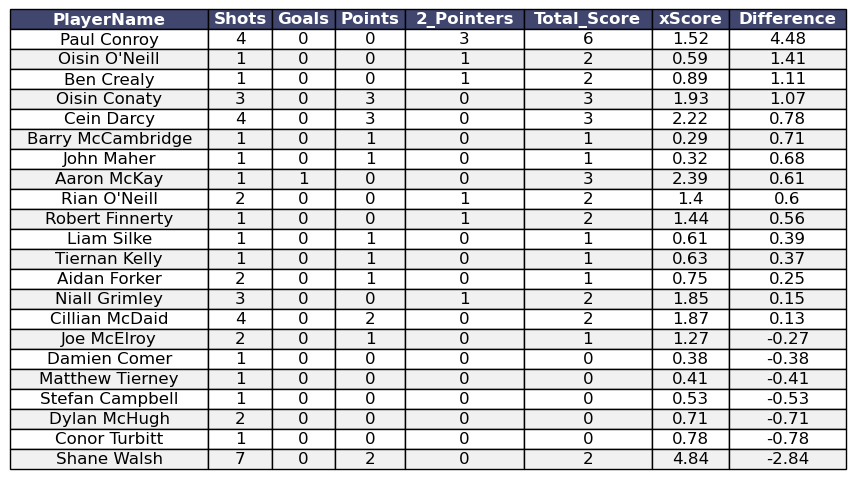

In [364]:
# Create a figure and axis

# Create a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed

# Remove the x and y axis
ax.axis('off')

# Create the table
table_data = md.values
table_columns = md.columns
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')

# Adjust the table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(md.columns))))

# Style the table headers
for i in range(len(table_columns)):
    cell = table[(0, i)]
    cell.set_fontsize(14)
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#40466e')

# Style the table rows
for i in range(1, len(md) + 1):
    for j in range(len(table_columns)):
        cell = table[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#f1f1f2')
        else:
            cell.set_facecolor('white')

# Adjust cell borders
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

#plt.savefig('Game_Summary_Armagh_Galway.png', dpi=300, bbox_inches='tight')

# Show the table
plt.show()